# Problem statement

In this competition, you will build Regression models which accurately predict the popularity of new articles (the number of times it w will be shared online) based on ~60 features provided to you.

**Importance of online news**

The consumption of online news is expediting day by day due to the extensive adoption of smartphones and the rise of social networks. Note that online news content comprises various key properties. For example, it is easily produced and small in size; its lifespan is short and the cost is low. Such Qualities make news content more effective to be consumed on social sharing platforms. More interestingly, this sort of content can capture the eye of a signiﬁcant amount of Internet users within a brief period of your time. As a result, the main target on the analysis of online news content like predicting the recognition of stories articles, demonstrating the decay of interest over time to know the world of online news has greatly increased since it has so many practical meanings.

**Why news popularity prediction?**

There are multiple areas of applications for online news popularity prediction. Some of these benefits include gaining better insights into the audience consuming online news content. Consequently, it increases the ability of news organizations to deliver more relevant and appealing content in a proactive manner as well as the company can allocate resources more wisely to prepare stories over their life cycle. Moreover, prediction of news content is also beneﬁcial for trend forecasting, understanding the collective human behavior, advertisers to propose more proﬁtable monetization techniques, and readers to ﬁlter the huge amount of information quickly and efﬁciently.

# 1. Data Understanding, preparation and pre-processing

In [2]:
# Importing the necessary packages
import numpy as np # linear algebra
import pandas as pd 
import numpy as np
import os
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


In [3]:
#Load the data set
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
news_data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)

(29733, 61)
(9911, 60)
(9911, 2)


In [4]:
#Checking the description of the Data
for i in news_data_dict.iterrows():
    print(i[1]['column'],':',i[1]['description'])

url : URL of the article (non-predictive)
timedelta : Days between the article publication and the dataset acquisition (non-predictive)
ntokenstitle : Number of words in the title
ntokenscontent : Number of words in the content
nuniquetokens : Rate of unique words in the content
nnonstop_words : Rate of non-stop words in the content
nnonstopuniquetokens : Rate of unique non-stop words in the content
num_hrefs : Number of links
numselfhrefs : Number of links to other articles published by Mashable
num_imgs : Number of images
num_videos : Number of videos
averagetokenlength : Average length of the words in the content
numkeywords : Number of keywords in the metadata
datachannelislifestyle : Is data channel 'Lifestyle'?
datachannelis_entertainment : Is data channel 'Entertainment'?
datachannelis_bus : Is data channel 'Business'?
datachannelis_socmed : Is data channel 'Social Media'?
datachannelis_tech : Is data channel 'Tech'?
datachannelis_world : Is data channel 'World'?
kwminmin : Wors

In [5]:
#Head
data.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [6]:
#Details of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [7]:
#checking the Number of Null values
missing_data_per=round(100 *(data.isnull().sum()/len(data.index)),2)
missing_data_per

id                                0.00
url                               0.00
n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.73
num_self_hrefs                   15.25
num_imgs                         18.19
num_videos                        1.97
average_token_length              0.00
num_keywords                      1.56
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.65
kw_max_min                        1.53
kw_avg_min                        0.28
kw_min_max                        0.46
kw_max_max                        5.10
kw_avg_max                        0.39
kw_min_avg               

In [8]:
#checking null value in descending order
data.isnull().sum().sort_values(ascending=False)

num_imgs                         5407
num_self_hrefs                   4533
global_subjectivity              2246
is_weekend                       2168
self_reference_max_shares        1762
weekday_is_wednesday             1554
kw_max_max                       1515
weekday_is_sunday                1496
abs_title_sentiment_polarity     1457
avg_positive_polarity            1238
kw_min_min                       1084
weekday_is_monday                 981
kw_avg_avg                        973
global_rate_negative_words        888
weekday_is_friday                 866
global_rate_positive_words        835
num_hrefs                         812
abs_title_subjectivity            799
min_negative_polarity             782
weekday_is_tuesday                753
max_negative_polarity             712
kw_max_avg                        681
rate_negative_words               593
num_videos                        587
rate_positive_words               587
num_keywords                      464
kw_max_min  

# 2. Data Cleaning

In [9]:
# To check each variable datatype 
data.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [10]:
# checking the shape of the data again 
data.shape

(29733, 61)

In [11]:
# Checking if there are columns with one unique value since it won't affect our analysis
data.nunique(dropna=True)

id                               29733
url                              29733
n_tokens_title                      20
n_tokens_content                  2250
n_unique_tokens                  21820
n_non_stop_words                  1404
n_non_stop_unique_tokens         18703
num_hrefs                          124
num_self_hrefs                      55
num_imgs                            86
num_videos                          52
average_token_length             23555
num_keywords                        10
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          23
kw_max_min                        1038
kw_avg_min                       14367
kw_min_max                         957
kw_max_max                          30
kw_avg_max                       24057
kw_min_avg               

 As, we can see we don't have any unique value columns so will not do anything with that

In [12]:
# imputing missing values
impute_features_data = missing_data_per[missing_data_per.gt(0)].index
impute_features_data

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [13]:
# Imputed with simple Imputer

imp = SimpleImputer(strategy='constant', fill_value=0)
data[impute_features_data] = imp.fit_transform(data[impute_features_data])

In [15]:
#Checking the Null values again 
round(100 *(data.isnull().sum()/len(data.index)),2)


id                               0.0
url                              0.0
n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
k

## Now we can see that there are no NULL values so we can now go for EDA Analysis

# 3. EDA Analysis

### Target Exploration

Since the range of number of share is too large , we will perform log transform and then check the distribution

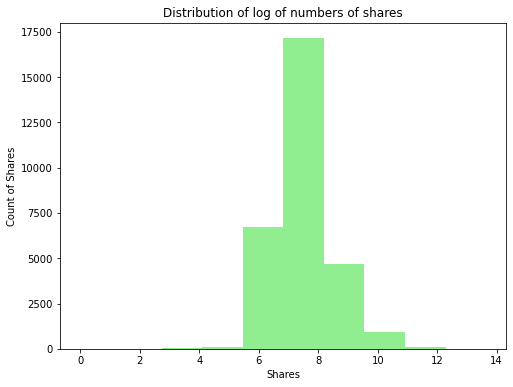

In [16]:
# choose features and target
X = data.iloc[:,2:60] # select all columns except URL and TARGET
y = data["shares"].values.ravel() #target:number of shares
plt.figure(figsize= (8,6))
plt.hist(np.log(y),color="lightgreen")
plt.xlabel("Shares")
plt.ylabel("Count of Shares")
plt.title("Distribution of log of numbers of shares")
plt.show()


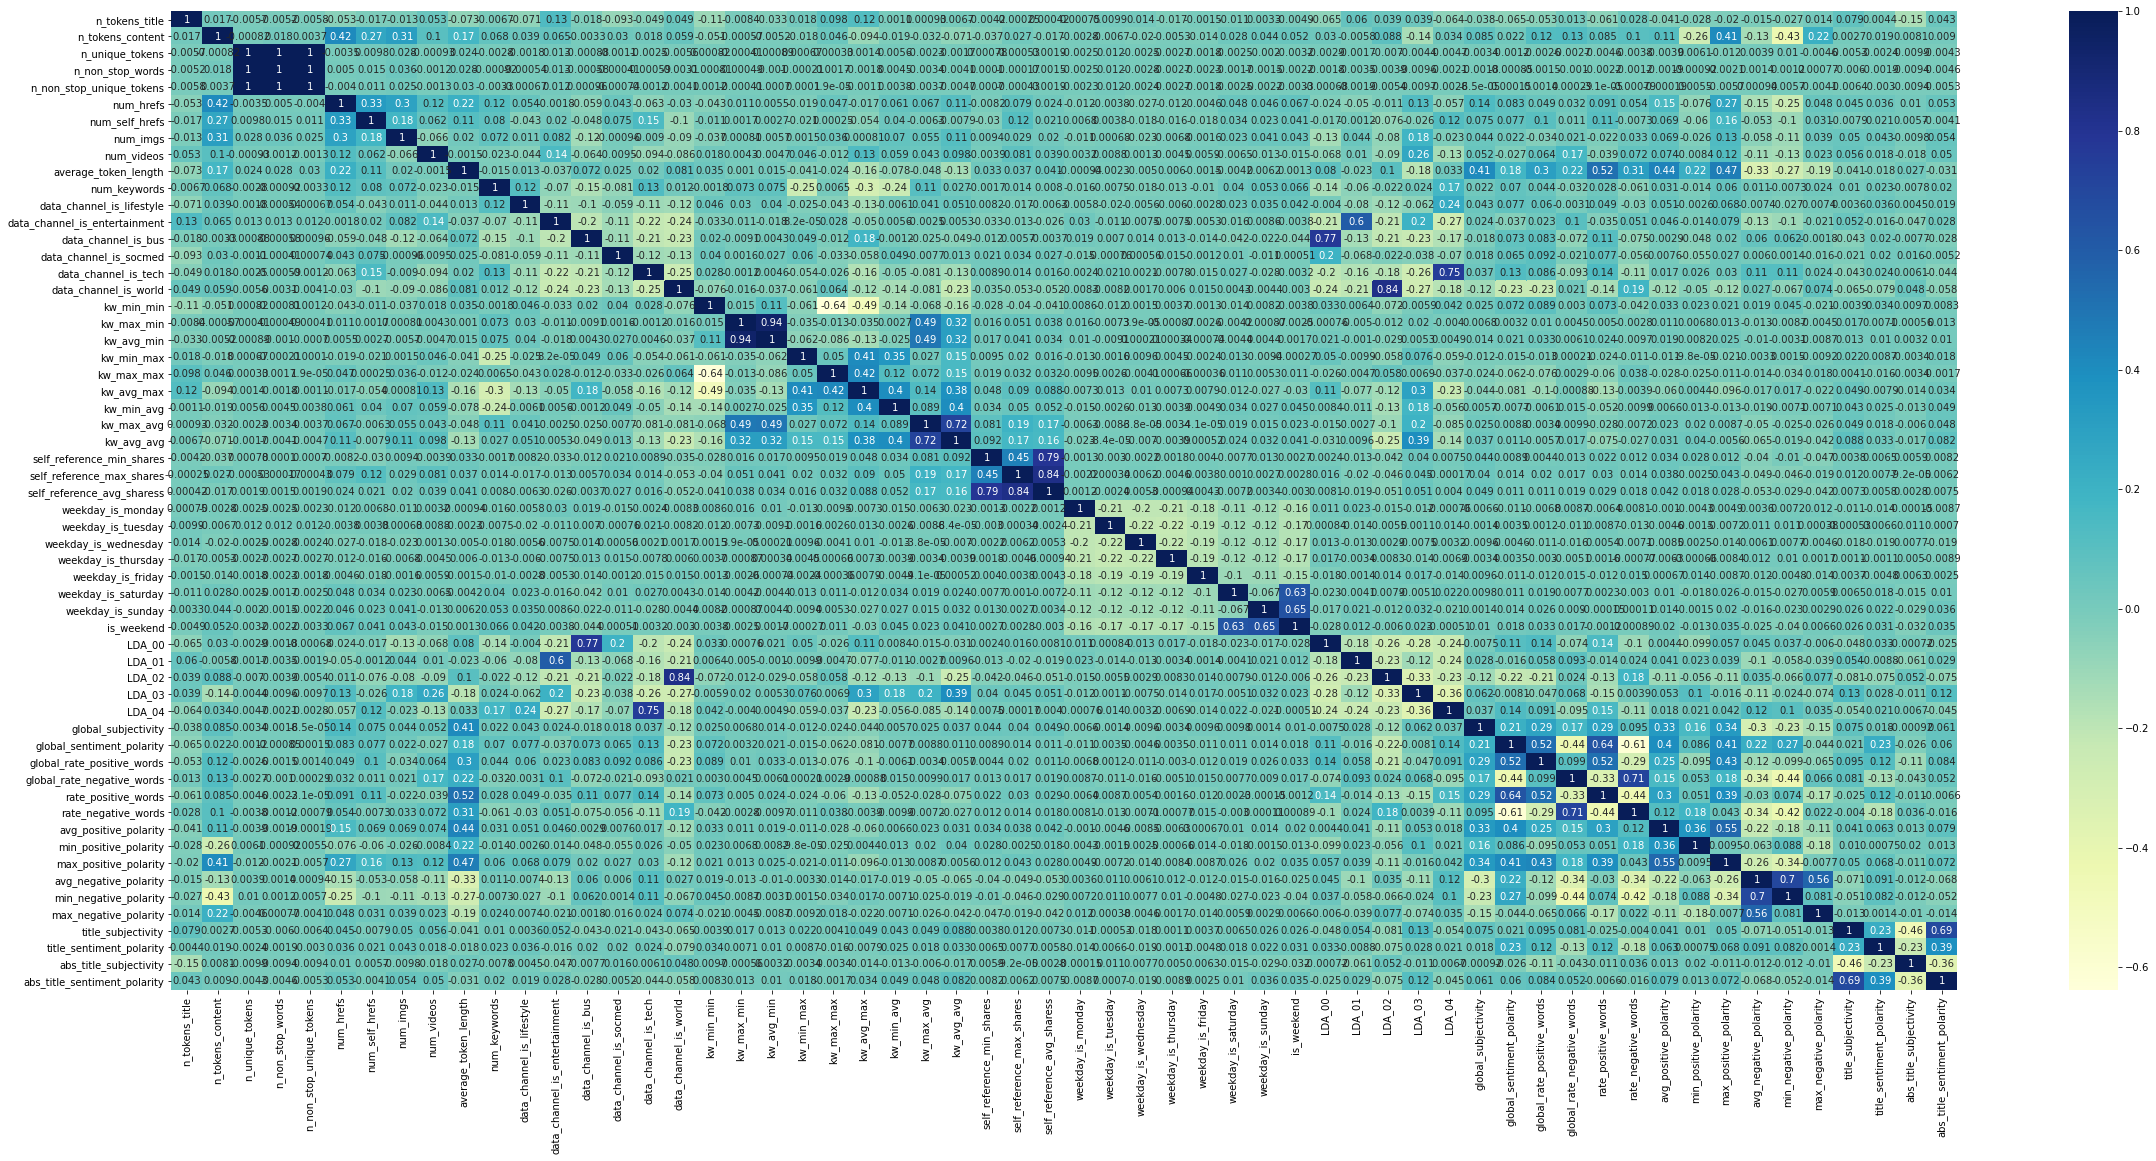

In [17]:
# plot the feature correlation heatmap
plt.figure(figsize=(40,18))
sns.heatmap(X.corr(),cmap="YlGnBu",annot=True) 
plt.show()

From the correlation above, we can see that multicollinearity is less ,so no need to drop any columns

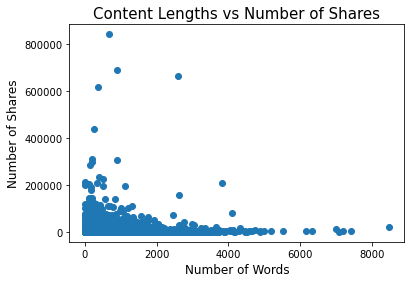

In [18]:
# number of words in the content vs number of shares
plt.scatter(data["n_tokens_content"], data["shares"])
plt.title("Content Lengths vs Number of Shares", size=15)
plt.xlabel("Number of Words", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

When number of words in the content is more then number of shares is more

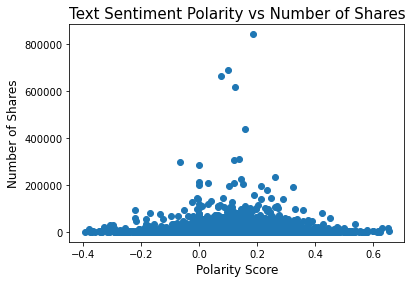

In [19]:
# text sentiment polarity vs number of shares
plt.scatter(data["global_sentiment_polarity"], data["shares"])
plt.title("Text Sentiment Polarity vs Number of Shares", size=15)
plt.xlabel("Polarity Score", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

So, we can see when the text sentiment polarity score is more, the number of share is also more in such scenarios

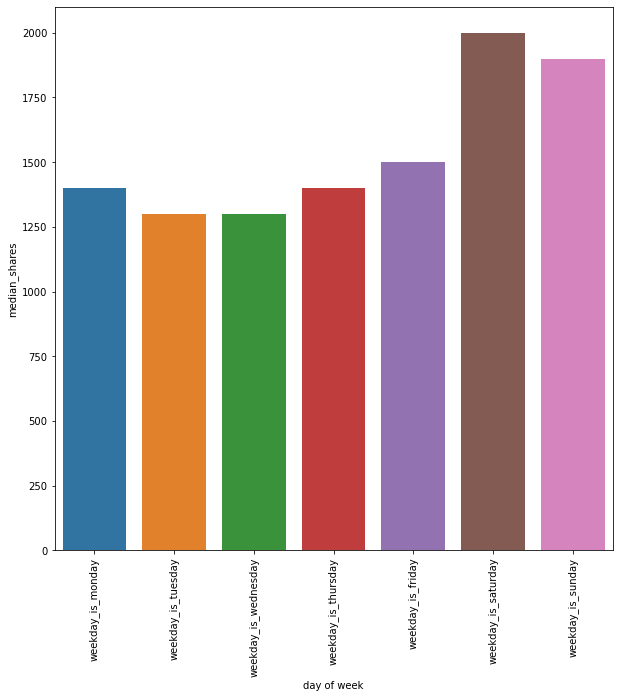

In [20]:
plt.figure(figsize= (10,10))
shares = []
cols = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday']
for d in cols:
    shares.append(data[data[d] == 1]['shares'].median())

ax = sns.barplot(x = cols, y = shares)
ax.set(xlabel = 'day of week', ylabel = 'median_shares')
plt.xticks(rotation = 90)
plt.show()

From the graph we can see that on Saturday has got maximum number of shares

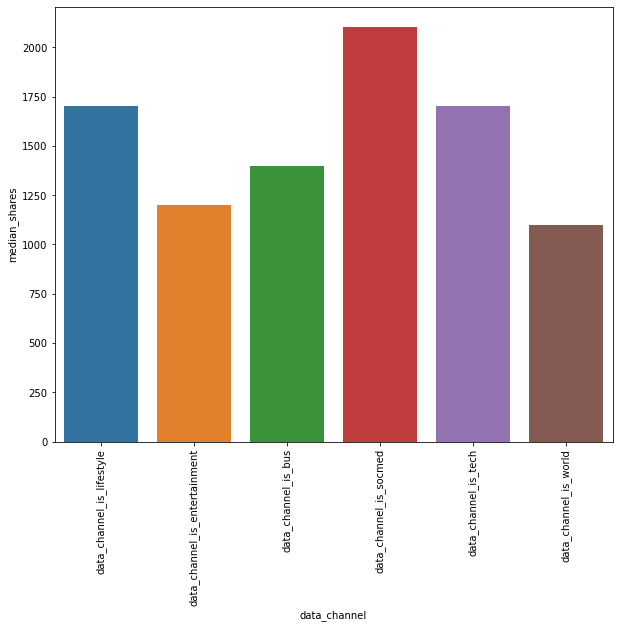

In [21]:
plt.figure(figsize= (10,8))
channel = []
cols = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']
for d in cols:
    channel.append(data[data[d]==1]['shares'].median())

ax = sns.barplot(x = cols, y = channel)
ax.set(xlabel = 'data_channel', ylabel = 'median_shares')
plt.xticks(rotation = 90)
plt.show()

When the DATA CHANNEL is SOCIAL MEDIA , there are maximum number of shares

# 4. Outliers Treatment


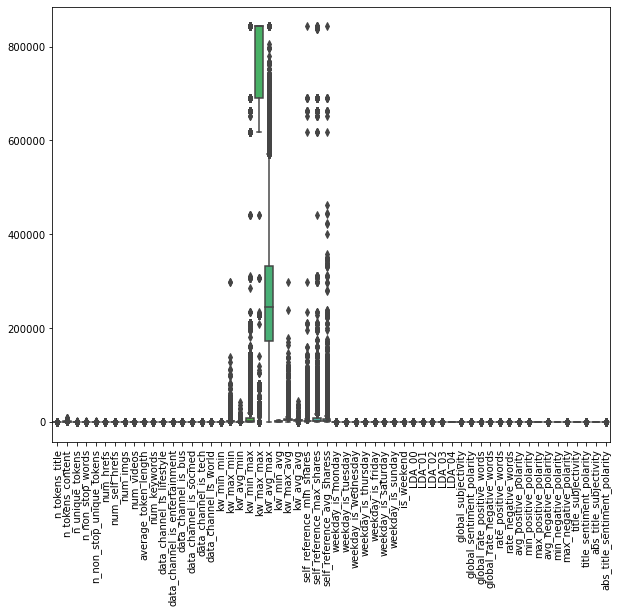

In [22]:
#checking for outliers
plt.figure(figsize=(10,8))
plt.xticks(rotation =90)
sns.boxplot(data = X)
plt.show()

 We can see so many outliers are there.So let's handle the outliers

In [23]:
# Finding negative value columns.
negcols_data=X.columns[(X<=0).any()]
negcols_data

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positiv

In [24]:
#converting negative values to positive values .

for i in negcols_data:
    m=X[i].min()
    name=i 
    print(name)
    X[name]=((X[i]+1)-m)

n_tokens_content
n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens
num_hrefs
num_self_hrefs
num_imgs
num_videos
average_token_length
num_keywords
data_channel_is_lifestyle
data_channel_is_entertainment
data_channel_is_bus
data_channel_is_socmed
data_channel_is_tech
data_channel_is_world
kw_min_min
kw_max_min
kw_avg_min
kw_min_max
kw_max_max
kw_avg_max
kw_min_avg
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
weekday_is_monday
weekday_is_tuesday
weekday_is_wednesday
weekday_is_thursday
weekday_is_friday
weekday_is_saturday
weekday_is_sunday
is_weekend
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
global_rate_negative_words
rate_positive_words
rate_negative_words
avg_positive_polarity
min_positive_polarity
max_positive_polarity
avg_negative_polarity
min_negative_polarity
max_negative_polarity
title_subjectivity
title_sentiment_polarity
abs_title_subjectivity
abs_tit

In [25]:
# Checking negative columns
negcols_data=X.columns[(X<=0).any()]
negcols_data

Index([], dtype='object')

In [26]:
# log transform with constant 10000 for real numbers
X = np.log((10000 + X))

In [27]:
# Treating Outlier
for col in X.columns:
    percentiles = X[col].quantile([0.01, 0.99]).values
    X[col][X[col] <= percentiles[0]] = percentiles[0]
    X[col][X[col] >= percentiles[1]] = percentiles[1]

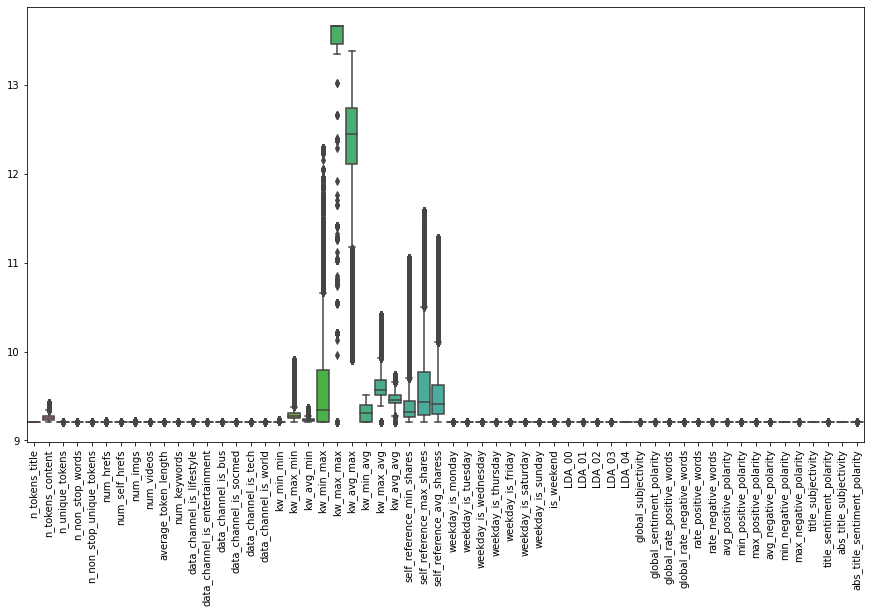

In [28]:
#checking for outliers again
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = X)
plt.show()


After capping also few columns are not showhing good results so dropping them 

In [29]:
cols = ['kw_min_min',
'kw_max_min',
'kw_avg_min',
'kw_min_max',
'kw_max_max',
'kw_avg_max',
'kw_min_avg',
'kw_max_avg',
'kw_avg_avg',
'data_channel_is_world',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'data_channel_is_tech',
 'data_channel_is_socmed',
'data_channel_is_lifestyle',
'data_channel_is_entertainment',
'data_channel_is_bus',
'data_channel_is_socmed',
'data_channel_is_tech',
'data_channel_is_world',
 'num_keywords',
'average_token_length',
'num_videos',
'num_hrefs',
'num_self_hrefs',
'num_imgs',
'num_videos',
'n_non_stop_unique_tokens',
 'n_non_stop_words',
 'n_unique_tokens',
 'n_tokens_content']
X = X.drop(cols, axis=1)

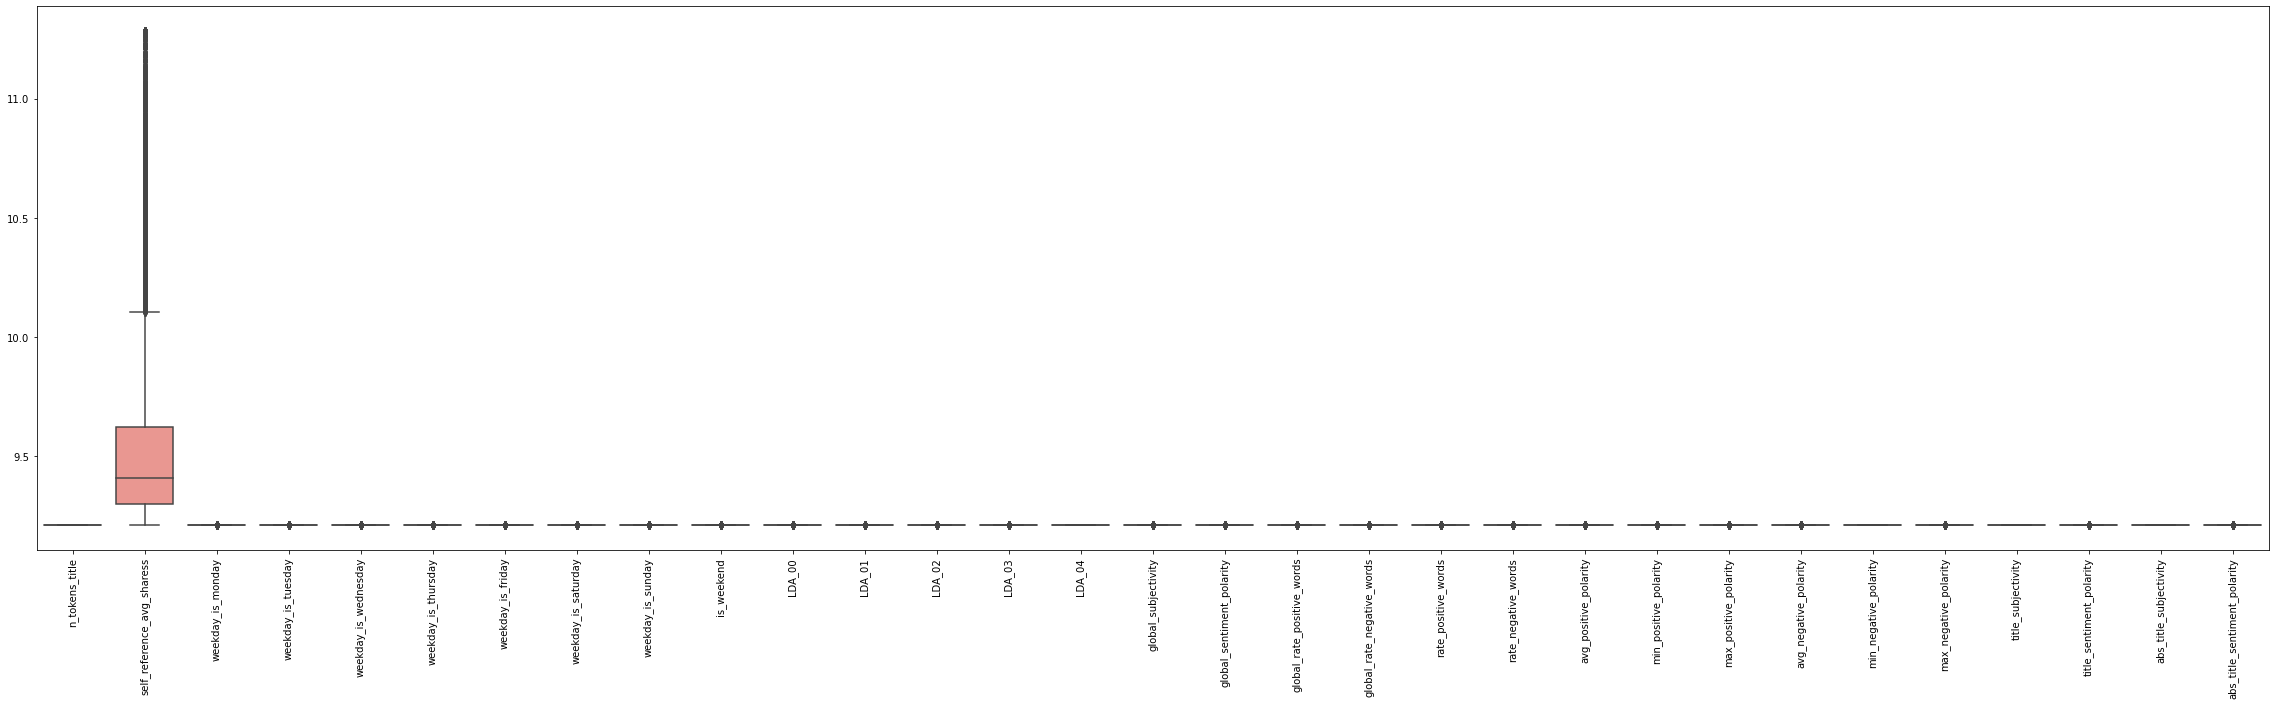

In [30]:
#checking for outliers again
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.boxplot(data = X)
plt.show()

### Plotting the correlations for each feature for bivariate analysis

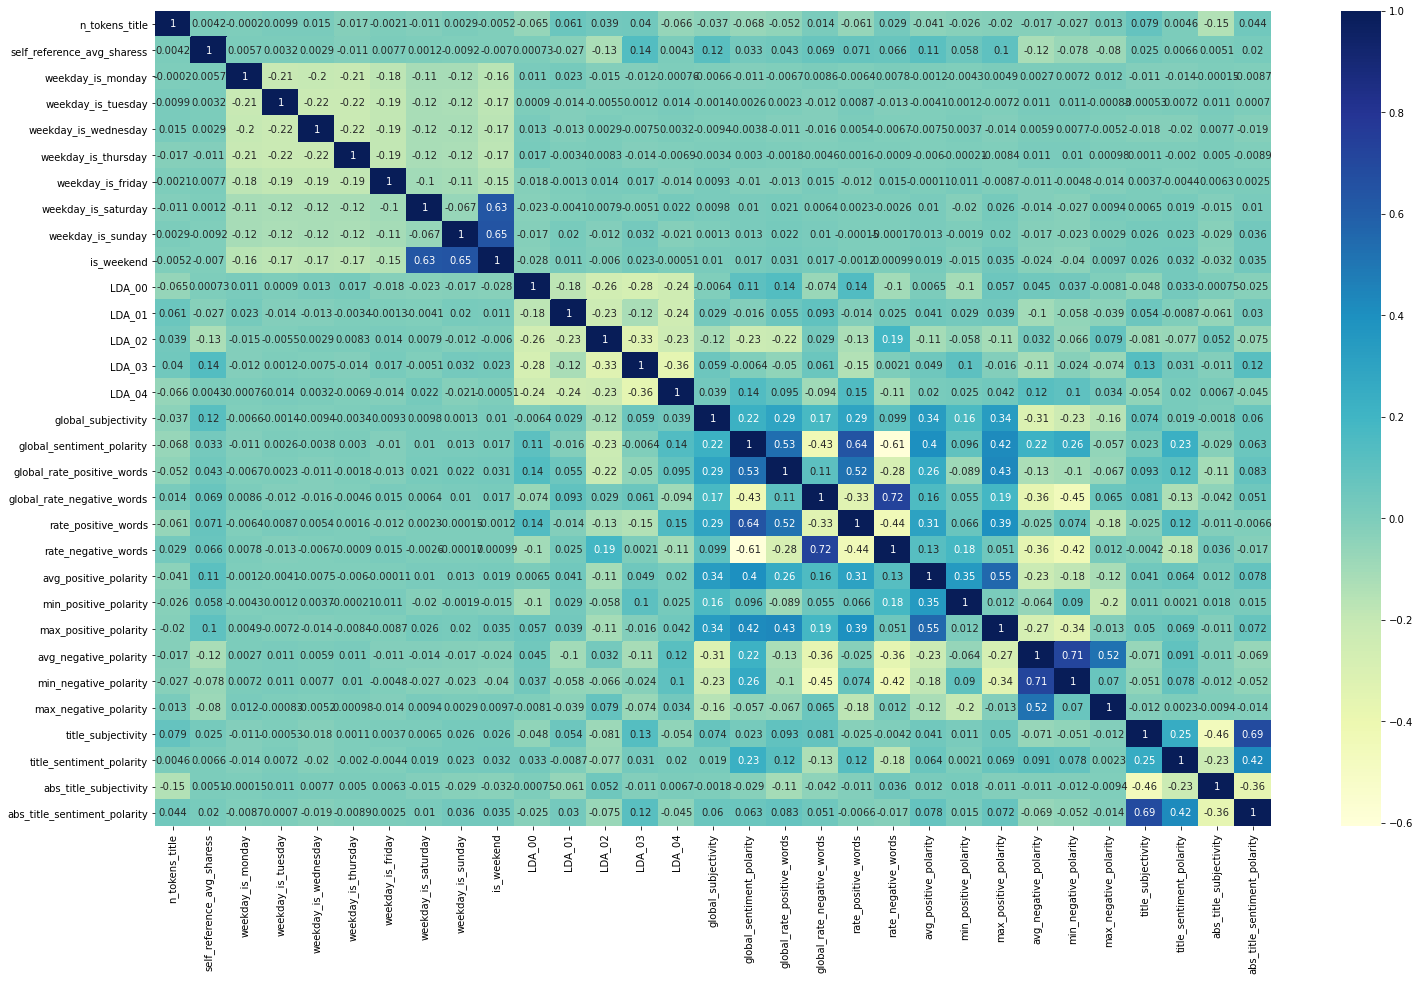

In [31]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(X.corr(),cmap="YlGnBu", annot=True)
plt.show()

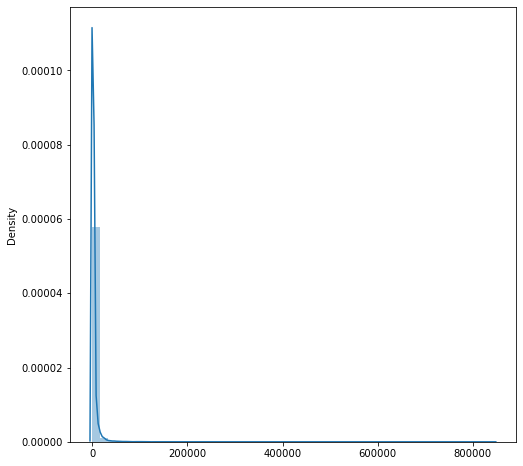

In [32]:
# Distribution for the target Variable
plt.figure(figsize=(8,8))
sns.distplot(y)
plt.show()


### Log Transform

All the features are almost positively skewed, we'll log transform the features to neutralize the positive skewness in the dataset.

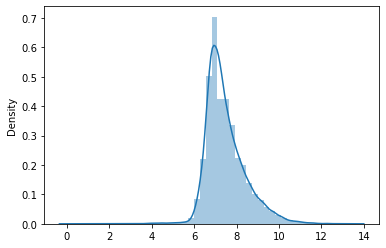

In [33]:
y = np.log(y)
sns.distplot(y)
# sns.distplot(np.log(y))
plt.show()

## SCALING

In [34]:
scaler = StandardScaler()

X[:] = scaler.fit_transform(X)

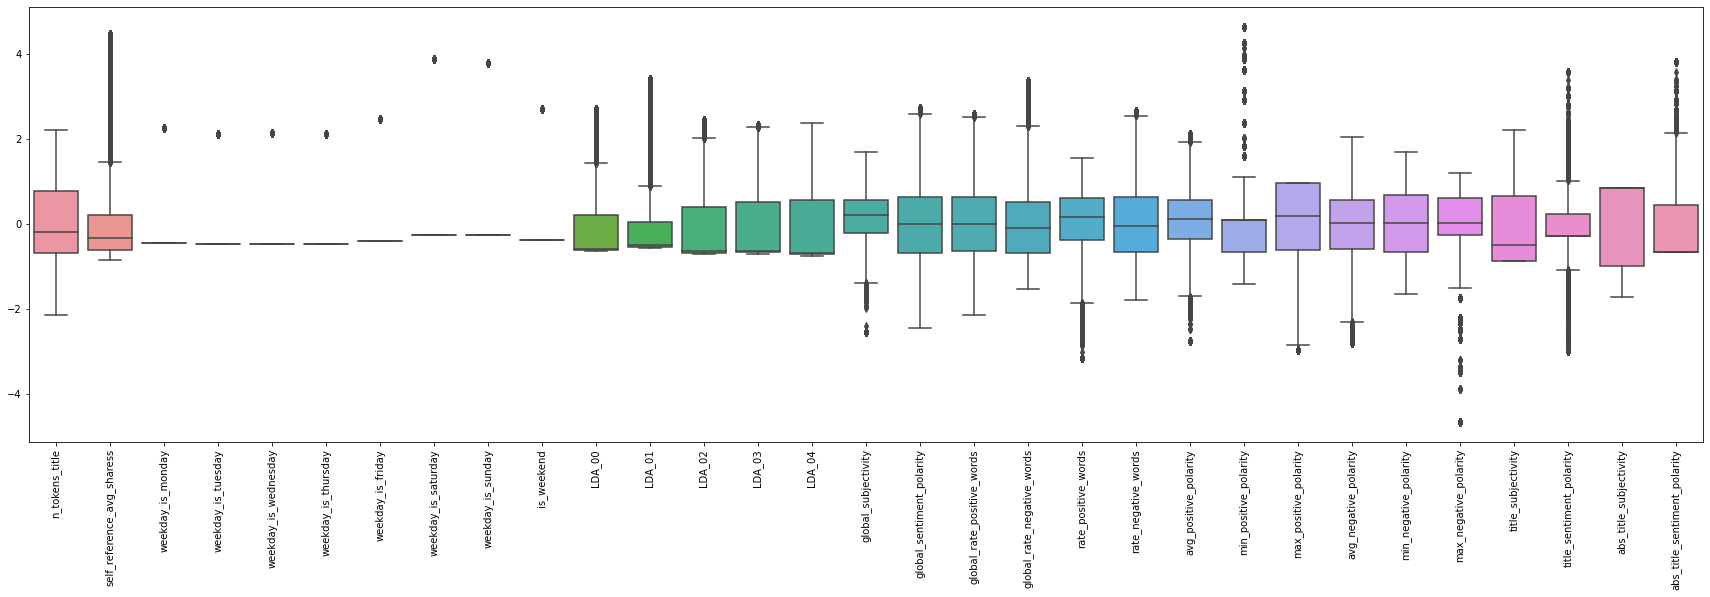

In [35]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
sns.boxplot(data = X)
plt.show()

# 5 . Model Building

### Split into train test

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20813, 31) (20813,)
(8920, 31) (8920,)


In [37]:
X_train.head()

,n_tokens_title,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
4585,-0.675068,-0.107795,-0.440237,2.119643,-0.464891,-0.472044,-0.401464,-0.256467,-0.262960,-0.369806,0.650721,1.046511,-0.649318,-0.644852,-0.086993,0.640007,0.896028,-0.805252,-0.388586,-0.005927,0.331270,1.589903,-1.411268,0.980827,1.156466,1.278426,0.032724,-0.866622,-0.279910,0.859443,-0.663632
13413,-0.675068,-0.646388,-0.440237,-0.471778,-0.464891,2.118447,-0.401464,-0.256467,-0.262960,-0.369806,1.725247,0.456562,-0.625773,-0.622273,-0.668857,-0.044817,0.423440,1.070526,-0.508904,0.832263,-0.799077,-0.048392,-0.906342,0.980827,0.051349,-1.646126,0.032724,-0.082341,-0.134554,-0.450274,-0.495481
9073,1.743040,3.050495,-0.440237,-0.471778,2.151043,-0.472044,-0.401464,-0.256467,-0.262960,-0.369806,-0.618202,0.350006,-0.688575,1.671128,-0.730387,0.717384,2.038832,-2.126029,-1.519574,1.568222,-1.791593,0.671475,-0.148957,0.586419,2.062930,1.696198,1.206579,0.290506,1.851921,-1.072938,1.802526
28754,0.292320,0.069781,-0.440237,-0.471778,-0.464891,2.118447,-0.401464,-0.256467,-0.262960,-0.369806,1.182822,-0.482874,-0.649012,0.601100,-0.691818,0.169661,0.232764,0.466531,-0.532896,0.709602,-0.633659,-0.192324,-0.906342,-0.005201,0.020687,1.696198,0.619653,0.535952,0.248654,-1.482846,-0.052176
21620,0.292320,-0.309033,-0.440237,-0.471778,-0.464891,-0.472044,-0.401464,-0.256467,3.802865,2.704121,-0.124296,-0.510149,0.510129,0.693519,-0.708348,-0.469074,0.348555,-0.633492,-1.093551,0.893593,-0.881786,0.912376,0.103503,0.980827,-2.795951,-0.810514,-4.662814,-0.866622,-0.279910,0.859443,-0.663632


We wil choose 15 components here

## Feature Engineering and Selection

Let's Understand the feature importance for raw features as well as components to decide top features for modelling.

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

rfe = RFE(lr, 15)             #selected top 15 features
rfe = rfe.fit(X_train, Y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('n_tokens_title', False, 8),
 ('self_reference_avg_sharess', True, 1),
 ('weekday_is_monday', False, 6),
 ('weekday_is_tuesday', False, 15),
 ('weekday_is_wednesday', False, 14),
 ('weekday_is_thursday', False, 17),
 ('weekday_is_friday', False, 2),
 ('weekday_is_saturday', True, 1),
 ('weekday_is_sunday', True, 1),
 ('is_weekend', True, 1),
 ('LDA_00', True, 1),
 ('LDA_01', True, 1),
 ('LDA_02', True, 1),
 ('LDA_03', True, 1),
 ('LDA_04', True, 1),
 ('global_subjectivity', False, 3),
 ('global_sentiment_polarity', False, 9),
 ('global_rate_positive_words', False, 11),
 ('global_rate_negative_words', False, 13),
 ('rate_positive_words', True, 1),
 ('rate_negative_words', True, 1),
 ('avg_positive_polarity', False, 16),
 ('min_positive_polarity', False, 4),
 ('max_positive_polarity', False, 12),
 ('avg_negative_polarity', False, 5),
 ('min_negative_polarity', True, 1),
 ('max_negative_polarity', False, 10),
 ('title_subjectivity', True, 1),
 ('title_sentiment_polarity', True, 1),
 ('a

In [40]:
#The columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['self_reference_avg_sharess', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'rate_positive_words', 'rate_negative_words',
       'min_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity'],
      dtype='object')

In [41]:
# will pass the above columns to X train and create a new df
X_train_rfe = X_train[col]
X_train_rfe.head()

,self_reference_avg_sharess,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,rate_positive_words,rate_negative_words,min_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
4585,-0.107795,-0.256467,-0.262960,-0.369806,0.650721,1.046511,-0.649318,-0.644852,-0.086993,-0.005927,0.331270,1.278426,-0.866622,-0.279910,0.859443
13413,-0.646388,-0.256467,-0.262960,-0.369806,1.725247,0.456562,-0.625773,-0.622273,-0.668857,0.832263,-0.799077,-1.646126,-0.082341,-0.134554,-0.450274
9073,3.050495,-0.256467,-0.262960,-0.369806,-0.618202,0.350006,-0.688575,1.671128,-0.730387,1.568222,-1.791593,1.696198,0.290506,1.851921,-1.072938
28754,0.069781,-0.256467,-0.262960,-0.369806,1.182822,-0.482874,-0.649012,0.601100,-0.691818,0.709602,-0.633659,1.696198,0.535952,0.248654,-1.482846
21620,-0.309033,-0.256467,3.802865,2.704121,-0.124296,-0.510149,0.510129,0.693519,-0.708348,0.893593,-0.881786,-0.810514,-0.866622,-0.279910,0.859443


In [42]:
# will pass the above columns to X test and create a new df
X_test_rfe = X_test[col]
X_test_rfe.head()

,self_reference_avg_sharess,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,rate_positive_words,rate_negative_words,min_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
17455,0.663615,-0.256467,-0.26296,-0.369806,1.104971,-0.490387,0.727584,-0.644323,-0.691919,0.457063,-0.293094,0.359309,1.499016,1.109024,-1.717081
25193,-0.257224,-0.256467,-0.26296,-0.369806,-0.550716,-0.459928,1.501511,-0.622251,0.015396,1.260240,-1.376245,0.025078,-0.866622,-0.279910,0.859443
13154,-0.590005,-0.256467,-0.26296,-0.369806,-0.576069,-0.490577,2.294149,-0.644867,-0.691924,-0.259827,-1.791593,0.025078,0.676206,-2.218041,-1.717081
6712,-0.829462,-0.256467,-0.26296,-0.369806,0.387167,-0.528802,-0.678652,-0.673103,1.399406,-1.055389,1.746472,0.359309,1.190465,-2.993320,-0.858225
29548,0.703349,-0.256467,-0.26296,-0.369806,1.729316,0.449981,-0.625770,-0.621342,-0.668560,-0.118368,0.482900,-1.646126,1.910412,-2.605679,0.344149


In [43]:
# Now applying PCA with the selected columns df
pca=PCA(random_state=42)
pca.fit_transform(X_train_rfe)

array([[-2.50567377e-01, -9.78097748e-01, -7.32876859e-01, ...,
        -7.46693107e-01,  1.01051443e-02, -1.53514379e-03],
       [-6.93288216e-01, -4.39678163e-01,  2.39943617e-01, ...,
         8.46874798e-01,  3.41618217e-03, -2.07286263e-03],
       [-2.86959051e+00,  3.71316727e-01,  2.13170457e+00, ...,
        -1.51316920e-01,  1.90945965e-02, -7.04409977e-04],
       ...,
       [-2.05858253e+00, -4.52081308e-02,  4.74824511e-01, ...,
         9.49863184e-02,  2.78628745e-03,  3.01498868e-04],
       [ 1.93349006e+00, -1.69778367e-01,  8.93476511e-01, ...,
        -1.18996124e+00,  6.22546526e-03,  2.94388714e-05],
       [ 3.76038063e+00, -8.95355139e-01, -4.64793756e-01, ...,
        -1.89934792e-01,  2.83008657e-03, -4.26846243e-04]])

In [44]:
# let's see the two components of PCA
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X_train_rfe.columns})
components

,PC1,PC2,Feature
0,0.000632,0.020673,self_reference_avg_sharess
1,0.015381,0.441853,weekday_is_saturday
2,0.030248,0.455123,weekday_is_sunday
3,0.033834,0.658354,is_weekend
4,-0.205455,-0.070710,LDA_00
5,0.044050,0.075460,LDA_01
6,0.303718,-0.075251,LDA_02
7,0.097318,0.142401,LDA_03
8,-0.242657,-0.064200,LDA_04
9,-0.455363,-0.032764,rate_positive_words


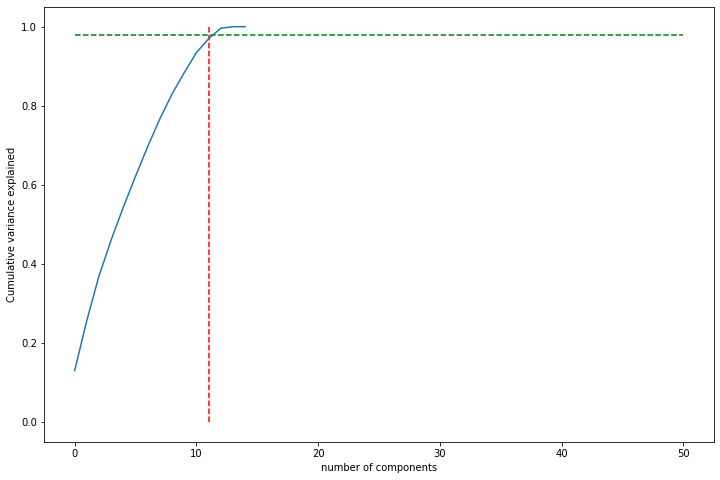

In [45]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=11, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot( np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel("Cumulative variance explained")
plt.show()

In [46]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_train_rfe.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],'Feature':colnames})


In [47]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_test_rfe.columns)
pca_df1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})


In [48]:
#Creating a new df on 15 features for train data
X_train_pca = X_train_rfe[pca_df.Feature[:11]]
X_train_pca.head()

,self_reference_avg_sharess,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,rate_positive_words,rate_negative_words
4585,-0.107795,-0.256467,-0.262960,-0.369806,0.650721,1.046511,-0.649318,-0.644852,-0.086993,-0.005927,0.331270
13413,-0.646388,-0.256467,-0.262960,-0.369806,1.725247,0.456562,-0.625773,-0.622273,-0.668857,0.832263,-0.799077
9073,3.050495,-0.256467,-0.262960,-0.369806,-0.618202,0.350006,-0.688575,1.671128,-0.730387,1.568222,-1.791593
28754,0.069781,-0.256467,-0.262960,-0.369806,1.182822,-0.482874,-0.649012,0.601100,-0.691818,0.709602,-0.633659
21620,-0.309033,-0.256467,3.802865,2.704121,-0.124296,-0.510149,0.510129,0.693519,-0.708348,0.893593,-0.881786


In [49]:
#Creating a new df on 15 features for train data
X_test_pca = X_test_rfe[pca_df1.Feature[:11]]
X_test_pca.head()

,self_reference_avg_sharess,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,rate_positive_words,rate_negative_words
17455,0.663615,-0.256467,-0.26296,-0.369806,1.104971,-0.490387,0.727584,-0.644323,-0.691919,0.457063,-0.293094
25193,-0.257224,-0.256467,-0.26296,-0.369806,-0.550716,-0.459928,1.501511,-0.622251,0.015396,1.260240,-1.376245
13154,-0.590005,-0.256467,-0.26296,-0.369806,-0.576069,-0.490577,2.294149,-0.644867,-0.691924,-0.259827,-1.791593
6712,-0.829462,-0.256467,-0.26296,-0.369806,0.387167,-0.528802,-0.678652,-0.673103,1.399406,-1.055389,1.746472
29548,0.703349,-0.256467,-0.26296,-0.369806,1.729316,0.449981,-0.625770,-0.621342,-0.668560,-0.118368,0.482900


In [50]:
# now doing final PCA with 11 components

pca_final = IncrementalPCA(n_components=11)
df_train_pca = pca_final.fit_transform(X_train_pca)
df_train_pca.shape

(20813, 11)

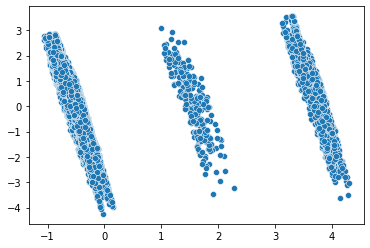

In [51]:
#Plotting first 2 PCA components
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1])
plt.show()

Applying the transformation on the test set

In [52]:
df_test_pca = pca_final.transform(X_test_pca)
df_test_pca.shape

(8920, 11)

# BASELINE MODELLING


## 1. LINEAR REGRESSION

In [53]:
# created a function to get all the valuable metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [54]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(df_train_pca, Y_train)
# predict the testing pca data
train_predict = lm.predict(df_train_pca)
test_predict = lm.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0811
r2:  0.0811
MAE:  0.6738
MSE:  0.8077
RMSE:  0.8987

Test metrics
explained_variance:  0.0756
r2:  0.0754
MAE:  0.6598
MSE:  0.7788
RMSE:  0.8825


# 2. Ridge Regression

In [55]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(df_train_pca, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [57]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(df_train_pca, Y_train)
print(ridge.coef_)

[ 0.07124782  0.05556722  0.13714722 -0.07551175 -0.10624862  0.00704012
  0.08064667  0.01111949 -0.06849533 -0.02857655 -0.74093558]


In [58]:
# predict it now...
train_predict = ridge.predict(df_train_pca)
test_predict = ridge.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0811
r2:  0.0811
MAE:  0.6738
MSE:  0.8077
RMSE:  0.8987

Test metrics
explained_variance:  0.0756
r2:  0.0754
MAE:  0.6598
MSE:  0.7788
RMSE:  0.8825


# 3. Lasso Regression

In [59]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(df_train_pca, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [61]:
#Fitting Lasso model for alpha = 50 and printing coefficients which have been penalised

alpha =0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(df_train_pca, Y_train) 

Lasso(alpha=0.0001)

In [62]:
lasso.coef_

array([ 0.07119429,  0.05550899,  0.13707875, -0.07543102, -0.10616027,
        0.00694585,  0.08054748,  0.01101176, -0.06829888, -0.0268306 ,
       -0.        ])

In [63]:
# predict it now...
train_predict = lasso.predict(df_train_pca)
test_predict = lasso.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0811
r2:  0.0811
MAE:  0.6738
MSE:  0.8078
RMSE:  0.8988

Test metrics
explained_variance:  0.0754
r2:  0.0752
MAE:  0.6599
MSE:  0.779
RMSE:  0.8826


## 6. CREATING SUBMISSION FILE

In [64]:
# checking the unknown data
unseen.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.65625,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.10,1.0,0.0,0.5,0.0
1,29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.75000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.0,0.0,0.5,0.0
2,29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.59375,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.15,0.0,0.0,0.5,0.0
3,29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.05,0.0,0.0,0.5,0.0
4,29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.65000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.0,0.0,0.5,0.0


In [65]:
submission_data = unseen.set_index('id')[X_train_pca.columns]
submission_data.shape

(9911, 11)

In [66]:
missing_data_percent1=round(100 *(submission_data.isnull().sum()/len(submission_data.index)),2)
missing_data_percent1

self_reference_avg_sharess    1.03
weekday_is_saturday           0.26
weekday_is_sunday             4.95
is_weekend                    7.09
LDA_00                        0.00
LDA_01                        0.00
LDA_02                        0.00
LDA_03                        0.00
LDA_04                        0.00
rate_positive_words           1.77
rate_negative_words           1.87
dtype: float64

In [67]:
# imputing missing values
impute_features1 = missing_data_percent1[missing_data_percent1.gt(0)].index
impute_features1

Index(['self_reference_avg_sharess', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'rate_positive_words',
       'rate_negative_words'],
      dtype='object')

In [68]:
# Imputed with simple Imputer

imp = SimpleImputer(strategy='constant', fill_value=0)
submission_data[impute_features1] = imp.fit_transform(submission_data[impute_features1])

In [69]:
#Checking the Null values again 
round(100 *(submission_data.isnull().sum()/len(submission_data.index)),2)

self_reference_avg_sharess    0.0
weekday_is_saturday           0.0
weekday_is_sunday             0.0
is_weekend                    0.0
LDA_00                        0.0
LDA_01                        0.0
LDA_02                        0.0
LDA_03                        0.0
LDA_04                        0.0
rate_positive_words           0.0
rate_negative_words           0.0
dtype: float64

In [68]:
submission_data = pca_final.transform(submission_data)
submission_data.shape

(9911, 11)

In [69]:
# We ll go for Ridge regression as it has the lowest RMSE
unseen["Shares"] = ridge.predict(submission_data)
output = unseen[['id','Shares']]
output.head()

,id,Shares
0,29733,377.945714
1,29734,797.363653
2,29735,7.131059
3,29736,1023.176437
4,29737,249.006488


Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [71]:
output.to_csv('submission.csv',index=False)